In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [541]:
df = pd.read_csv('solar_data.csv')
df = df.iloc[:,1:]

df.head()

,multi,cpg,save_time_id,save_time
0,0,0,20220225,2022-02-25 11:23:41
1,1,0,20220225,2022-02-25 11:24:41
2,2,0,20220225,2022-02-25 11:25:41
3,3,0,20220225,2022-02-25 11:26:42
4,4,0,20220225,2022-02-25 11:27:41


In [542]:
df_gsrems = df.copy()
df_gsrems['save_time'] = pd.to_datetime(df_gsrems['save_time'])

df_gsrems['save_time_id'] = pd.to_datetime(df_gsrems['save_time_id'], format='%Y%m%d')
df_gsrems['년'] = df_gsrems['save_time'].dt.year
df_gsrems['월'] = df_gsrems['save_time'].dt.month
df_gsrems['일'] = df_gsrems['save_time'].dt.day
df_gsrems['시간'] = df_gsrems['save_time'].dt.hour

df_gsrems.tail()

df1 = df_gsrems.copy()

In [543]:
for i in range(1, len(df_gsrems)) :
  yesterday_date = (df_gsrems.iloc[i]['save_time_id']-timedelta(days=1))

  filter_d = (df_gsrems['save_time_id'] == yesterday_date.strftime('%Y-%m-%d'))
  filter_m = (df_gsrems['multi'] == df_gsrems.iloc[i]['multi'])

  if filter_d.any():
    df_gsrems.loc[i, 'last_cpg_max'] = max(df_gsrems[filter_d & filter_m]['cpg'])
  else :
    df_gsrems.loc[i, 'last_cpg_max'] = 0

In [544]:
df_gsrems.fillna(0, inplace=True)

In [545]:
df_gsrems['금일누적발전량'] = df_gsrems['cpg']-df_gsrems['last_cpg_max']
df_gsrems['금일누적발전량'] = df_gsrems['금일누적발전량'].apply(lambda x: max(x, 0))

# df_gsrems.loc[25000]

In [546]:
df_today = df_gsrems[['년','월','금일누적발전량']]

df_today.head()

,년,월,금일누적발전량
0,2022,2,0.000
1,2022,2,0.000
2,2022,2,0.000
3,2022,2,0.000
4,2022,2,0.000


In [547]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

month_df = df_today.groupby(['년','월']).sum()

month_df

금일누적발전량
년    월             
2022 2   7554698000
     3   2051148000
     4   2619154000
     5   3222225000
     6   2302838000
     7   2432121000
     8   1984905000
     9   1773713000
     10  1938296000
     11  1359893000
     12  1244242000
2023 1   1434375000
     2   1569112000
     3  42611584000
     4   2203038000
     5   2437383000
     6   2484205000
     7    543095000
     8            0
     9            0

In [548]:
month_df.reset_index(inplace=True)

month_df.head()

,년,월,금일누적발전량
0,2022,2,7554698000
1,2022,3,2051148000
2,2022,4,2619154000
3,2022,5,3222225000
4,2022,6,2302838000


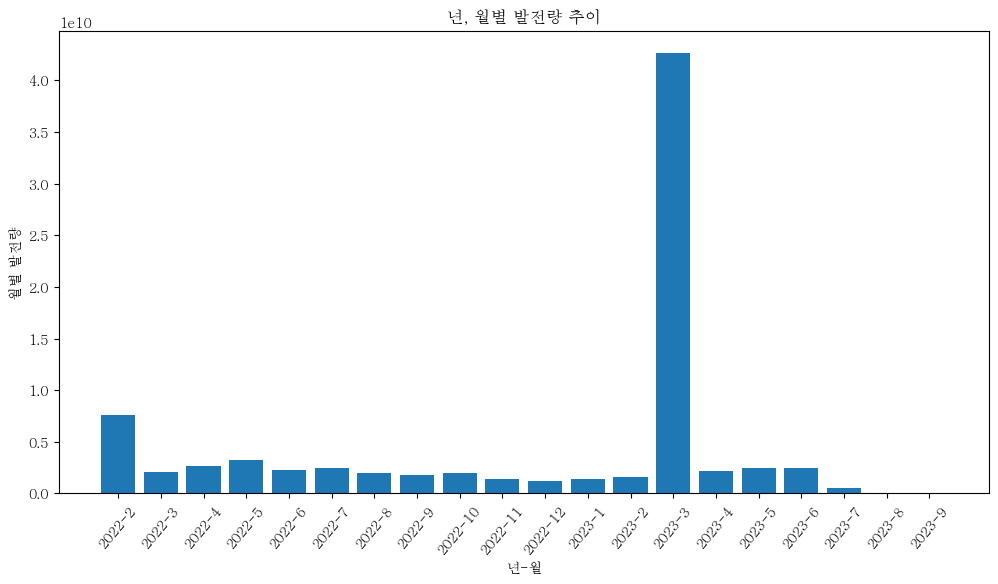

In [549]:
plt.figure(figsize=(12,6))
plt.bar(month_df['년'].astype(str) + '-' + month_df['월'].astype(str), month_df['금일누적발전량'])

plt.xlabel('년-월')
plt.ylabel('월별 발전량')
plt.title('년, 월별 발전량 추이')
plt.xticks(rotation=50)
plt.show()

In [550]:
df_test = df1.copy()

cond1 = (df_test['월'] == 1)

df_test[cond1].head()
# df_test.head()

,multi,cpg,save_time_id,save_time,년,월,일,시간
333187,6,0,2023-01-01,2023-01-01 04:00:09,2023,1,1,4
333188,7,0,2023-01-01,2023-01-01 04:01:09,2023,1,1,4
333189,0,0,2023-01-01,2023-01-01 04:02:11,2023,1,1,4
333190,1,0,2023-01-01,2023-01-01 04:03:09,2023,1,1,4
333191,2,0,2023-01-01,2023-01-01 04:04:09,2023,1,1,4


In [551]:

df_result = df_test.groupby(['multi','년','월'])['cpg'].max()

df_result = df_result.reset_index()

cond1 = (df_result['월'] == 1)

print(df_result[cond1])

df_result

     multi     년  월       cpg
11       0  2023  1  78328000
31       1  2023  1  82250000
51       2  2023  1  81889000
71       3  2023  1  84075000
91       4  2023  1  82379000
111      5  2023  1  77828000
131      6  2023  1  85365000
151      7  2023  1  84207000


,multi,년,월,cpg
0,0,2022,2,19193000
1,0,2022,3,25122000
2,0,2022,4,31702000
3,0,2022,5,38827000
4,0,2022,6,43826000
...,...,...,...,...
155,7,2023,5,107514000
156,7,2023,6,113950000
157,7,2023,7,115422000
158,7,2023,8,0


In [552]:
cond_2212 = (df_result['년'] == 2022) & (df_result['월'] == 12)
cond_2301 = (df_result['년'] == 2023) & (df_result['월'] == 1)
# df_result[cond_2212 | cond_2301]

df_2212 = df_result[cond_2212].sum()
df_2301 = df_result[cond_2301].sum()

print(df_2212, df_2301)

result = int(df_2301['cpg']) - int(df_2212['cpg'])

print(result)

new_row = {'년':2023,'월':1,'월별발생량':result, '월별발전량(MWh)':result/1000000}

new_row = pd.DataFrame([new_row])

new_row

multi           28
년            16176
월               96
cpg      616630000
dtype: int64 multi           28
년            16184
월                8
cpg      656321000
dtype: int64
39691000


,년,월,월별발생량,월별발전량(MWh)
0,2023,1,39691000,40


In [553]:
# df_result['월별발생량'] = df_result.groupby(['multi','년'])['cpg'].diff()
df_result['월별발생량'] = df_result.groupby(['multi', '년'])['cpg'].diff().fillna(0)
df_result

# cond1 = (df_result['월'] == 1)

# print(df_result[cond1])

,multi,년,월,cpg,월별발생량
0,0,2022,2,19193000,0
1,0,2022,3,25122000,5929000
2,0,2022,4,31702000,6580000
3,0,2022,5,38827000,7125000
4,0,2022,6,43826000,4999000
...,...,...,...,...,...
155,7,2023,5,107514000,6403000
156,7,2023,6,113950000,6436000
157,7,2023,7,115422000,1472000
158,7,2023,8,0,-115422000


In [554]:
df_final = df_result.dropna()
df_final = df_final[df_final['월별발생량'] > 0]

# cond1 = (df_final['월'] == 1)
# df_final[cond1]

In [555]:
df_last = df_final.groupby(['년','월'])['월별발생량'].sum().reset_index()

df_last

,년,월,월별발생량
0,2022,3,48972000
1,2022,4,57142000
2,2022,5,65300000
3,2022,6,45393000
4,2022,7,48799000
5,2022,8,40978000
6,2022,9,39266000
7,2022,10,48339000
8,2022,11,36432000
9,2022,12,35622000


In [556]:
# df_last['월별발전량(MWh)'] = df_last['월별발생량'].astype(float)/1000000.0
df_last['월별발전량(MWh)'] = df_last['월별발생량']/1000000.00

df_last

,년,월,월별발생량,월별발전량(MWh)
0,2022,3,48972000,49
1,2022,4,57142000,57
2,2022,5,65300000,65
3,2022,6,45393000,45
4,2022,7,48799000,49
5,2022,8,40978000,41
6,2022,9,39266000,39
7,2022,10,48339000,48
8,2022,11,36432000,36
9,2022,12,35622000,36


In [557]:
df_last = pd.concat([df_last.iloc[:10], new_row, df_last.iloc[10:]]).reset_index(drop=True)

df_last

,년,월,월별발생량,월별발전량(MWh)
0,2022,3,48972000,49
1,2022,4,57142000,57
2,2022,5,65300000,65
3,2022,6,45393000,45
4,2022,7,48799000,49
5,2022,8,40978000,41
6,2022,9,39266000,39
7,2022,10,48339000,48
8,2022,11,36432000,36
9,2022,12,35622000,36


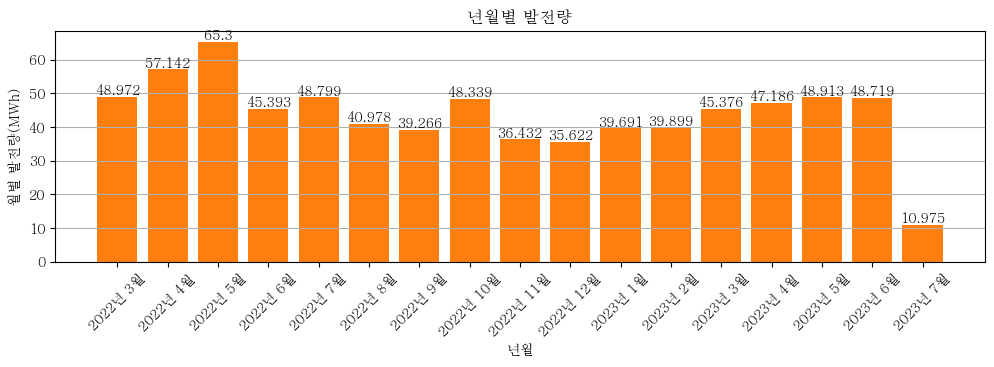

In [558]:
plt.figure(figsize=(12,3))

plt.bar(df_last.index, df_last['월별발전량(MWh)'])

bars = plt.bar(df_last.index, df_last['월별발전량(MWh)'])
# 각 막대의 높이에 해당하는 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')


# x축과 y축 라벨 설정
plt.xlabel('년월')
plt.ylabel('월별 발전량(MWh)')

# x축 눈금 레이블 설정
plt.xticks(df_last.index, [f'{int(row["년"])}년 {int(row["월"])}월' for idx, row in df_last.iterrows()], rotation=45)

# 그래프 제목 설정
plt.title('년월별 발전량')

# 그리드 표시
plt.grid(axis='y')

# 그래프 표시
plt.show()

In [559]:
df = pd.read_csv('tb_sladayhis_202403260941.csv')
df = df[['IVTID', 'EVTDATE', 'TPG', 'CPG', 'UPDDATIME']]

df['년'] = pd.to_datetime(df['UPDDATIME']).dt.year
df['월'] = pd.to_datetime(df['UPDDATIME']).dt.month
df['일'] = pd.to_datetime(df['UPDDATIME']).dt.day


df.head()

,IVTID,EVTDATE,TPG,CPG,UPDDATIME,년,월,일
0,IVT-2023091800004,20231021,171000,131796000,2023-10-21 06:44:13,2023,10,21
1,IVT-2023091800004,20231022,147000,131943000,2023-10-22 06:41:40,2023,10,22
2,IVT-2023091800004,20231023,218000,132161000,2023-10-23 06:41:34,2023,10,23
3,IVT-2023091800004,20231024,180000,132341000,2023-10-24 06:41:28,2023,10,24
4,IVT-2023091800004,20231025,209000,132550000,2023-10-25 06:45:12,2023,10,25


In [560]:

df1 = (df.groupby(['EVTDATE'])['TPG'].sum()/1000000).reset_index()

cond1 = df1['EVTDATE'] == 20231102

df1.loc[cond1,'TPG'] = 1.493   # 11월 노이즈 -> 1.493 MWh


df1


,EVTDATE,TPG
0,20231021,1
1,20231022,1
2,20231023,2
3,20231024,1
4,20231025,2
...,...,...
153,20240322,2
154,20240323,2
155,20240324,0
156,20240325,0


In [561]:
df1['EVTDATE'] = pd.to_datetime(df1['EVTDATE'], format="%Y%m%d")

df1['year'] = df1['EVTDATE'].dt.year
df1['month'] = df1['EVTDATE'].dt.month
df1['day'] = df1['EVTDATE'].dt.day

df1.tail()

,EVTDATE,TPG,year,month,day
153,2024-03-22,2,2024,3,22
154,2024-03-23,2,2024,3,23
155,2024-03-24,0,2024,3,24
156,2024-03-25,0,2024,3,25
157,2024-03-26,0,2024,3,26


In [562]:
df2 = df1.groupby(['year','month'])['TPG'].sum().reset_index()
# df2['TPG'] = df2['TPG']/1000000
df2

,year,month,TPG
0,2023,10,15
1,2023,11,35
2,2023,12,29
3,2024,1,35
4,2024,2,27
5,2024,3,40


In [563]:
total_df = df_last.copy()

total_df

,년,월,월별발생량,월별발전량(MWh)
0,2022,3,48972000,49
1,2022,4,57142000,57
2,2022,5,65300000,65
3,2022,6,45393000,45
4,2022,7,48799000,49
5,2022,8,40978000,41
6,2022,9,39266000,39
7,2022,10,48339000,48
8,2022,11,36432000,36
9,2022,12,35622000,36


In [564]:
row_before = {'년': [2021,2021,2022,2022],
              '월': [11,12,1,2],
              '월별발생량': [18396000,37824000,42198000,46568000],
              '월별발전량(MWh)':[18396000/1000000, 37824000/1000000, 42198000/1000000, 46568000/1000000]}

row_before = pd.DataFrame(row_before)

row_before

total_df = pd.concat([row_before, total_df]).reset_index(drop=True)

total_df


,년,월,월별발생량,월별발전량(MWh)
0,2021,11,18396000,18
1,2021,12,37824000,38
2,2022,1,42198000,42
3,2022,2,46568000,47
4,2022,3,48972000,49
5,2022,4,57142000,57
6,2022,5,65300000,65
7,2022,6,45393000,45
8,2022,7,48799000,49
9,2022,8,40978000,41


In [565]:
df = total_df.copy()
df = df.iloc[:-1,:]

row_after = {'년': [2023,2023,2023,2023],
              '월': [7,8,9,10],
              '월별발생량': [32536460,46150720,38219400,42955500],
              '월별발전량(MWh)':[32536460/1000000, 46150720/1000000, 38219400/1000000, 42955500/1000000]}

row_after = pd.DataFrame(row_after)

# row_after

df = pd.concat([df, row_after]).reset_index(drop=True)
df


,년,월,월별발생량,월별발전량(MWh)
0,2021,11,18396000,18
1,2021,12,37824000,38
2,2022,1,42198000,42
3,2022,2,46568000,47
4,2022,3,48972000,49
5,2022,4,57142000,57
6,2022,5,65300000,65
7,2022,6,45393000,45
8,2022,7,48799000,49
9,2022,8,40978000,41


In [566]:
df2 = df2.iloc[1:,].copy()
df2['TPG1'] = df2['TPG']*1000000

df2

,year,month,TPG,TPG1
1,2023,11,35,35253000
2,2023,12,29,29497000
3,2024,1,35,34709000
4,2024,2,27,27409000
5,2024,3,40,39694000


In [567]:
df3 = df2.copy()

df3.columns = ['년','월','월별발전량(MWh)','월별발생량']

df3 = df3[['년','월','월별발생량', '월별발전량(MWh)']]

df3

,년,월,월별발생량,월별발전량(MWh)
1,2023,11,35253000,35
2,2023,12,29497000,29
3,2024,1,34709000,35
4,2024,2,27409000,27
5,2024,3,39694000,40


In [568]:
df = pd.concat([df, df3]).reset_index(drop=True)
df

,년,월,월별발생량,월별발전량(MWh)
0,2021,11,18396000,18
1,2021,12,37824000,38
2,2022,1,42198000,42
3,2022,2,46568000,47
4,2022,3,48972000,49
5,2022,4,57142000,57
6,2022,5,65300000,65
7,2022,6,45393000,45
8,2022,7,48799000,49
9,2022,8,40978000,41


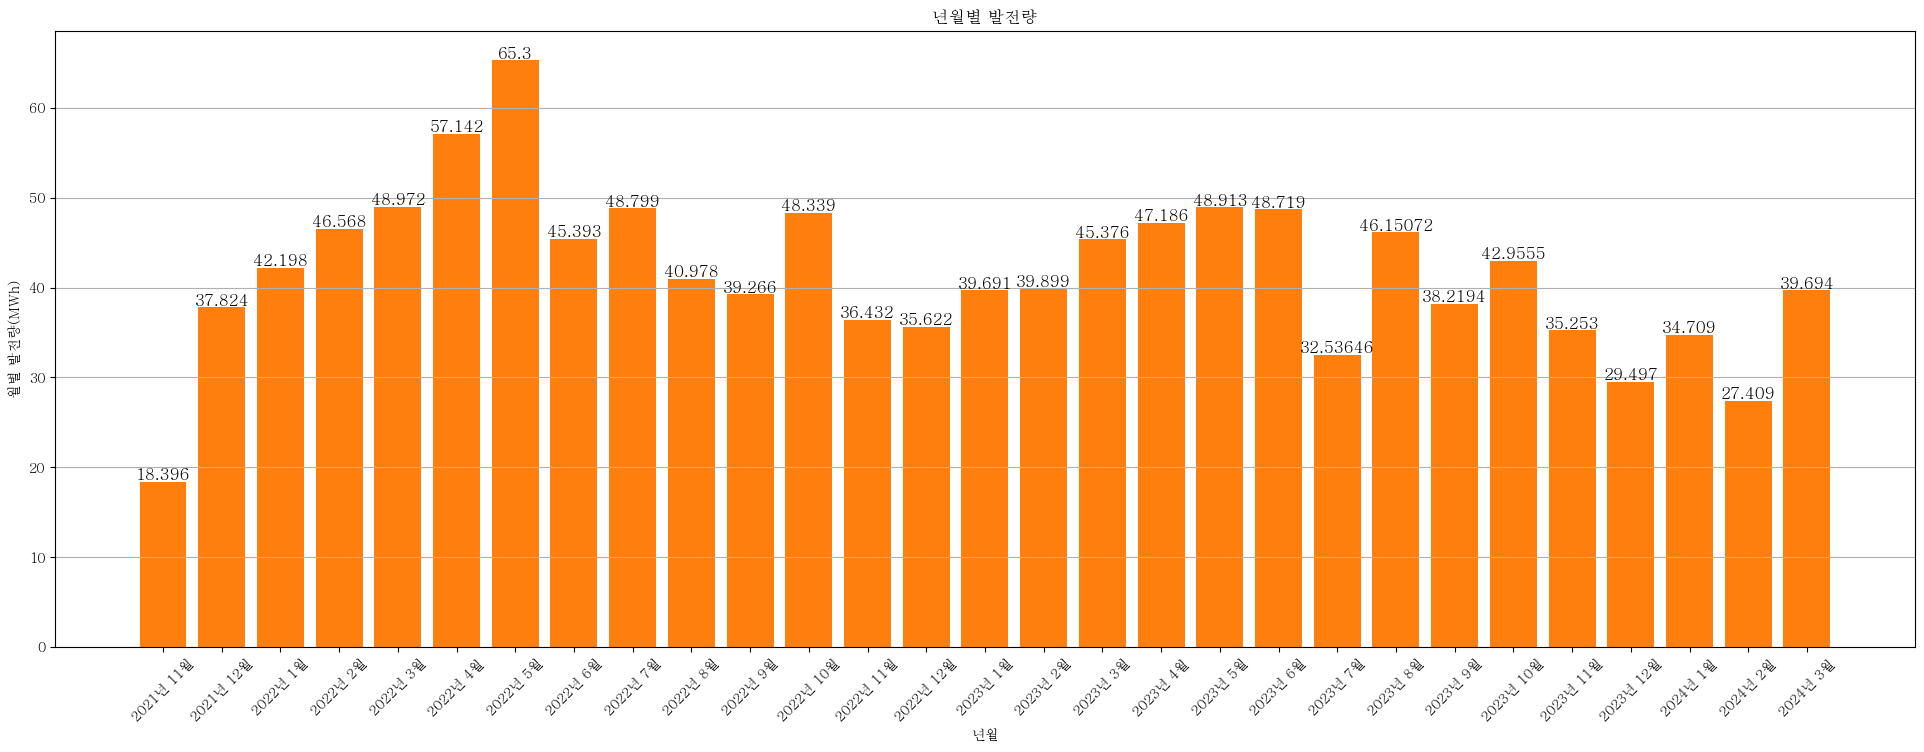

In [569]:
plt.figure(figsize=(24,8))

plt.bar(df.index, df['월별발전량(MWh)'])

bars = plt.bar(df.index, df['월별발전량(MWh)'])
# 각 막대의 높이에 해당하는 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')


# x축과 y축 라벨 설정
plt.xlabel('년월')
plt.ylabel('월별 발전량(MWh)')

# x축 눈금 레이블 설정
plt.xticks(df.index, [f'{int(row["년"])}년 {int(row["월"])}월' for idx, row in df.iterrows()], rotation=45)


# 그래프 제목 설정
plt.title('년월별 발전량')

# 그리드 표시
plt.grid(axis='y')

# 그래프 표시
plt.show()

In [570]:
df[['년','월','월별발전량(MWh)']]

df.to_excel('namhae.xlsx', index=False)

In [571]:
res = sum(df['월별발전량(MWh)'])
res

1207.4370800000002

In [572]:
df = pd.read_csv("power_generate.csv")
df['예상 수익'] = df['예상 수익'].str.replace(',', '').astype(float)
df

,일자,년,월,월별발전량,SMP평균단가,예상 수익
0,202111,2021,11,18,126,2326
1,202112,2021,12,38,142,5374
2,202201,2022,1,42,152,6424
3,202202,2022,2,47,194,9053
4,202203,2022,3,49,192,9413
5,202204,2022,4,57,201,11495
6,202205,2022,5,65,139,9067
7,202206,2022,6,45,128,5831
8,202207,2022,7,49,150,7326
9,202208,2022,8,41,195,7999


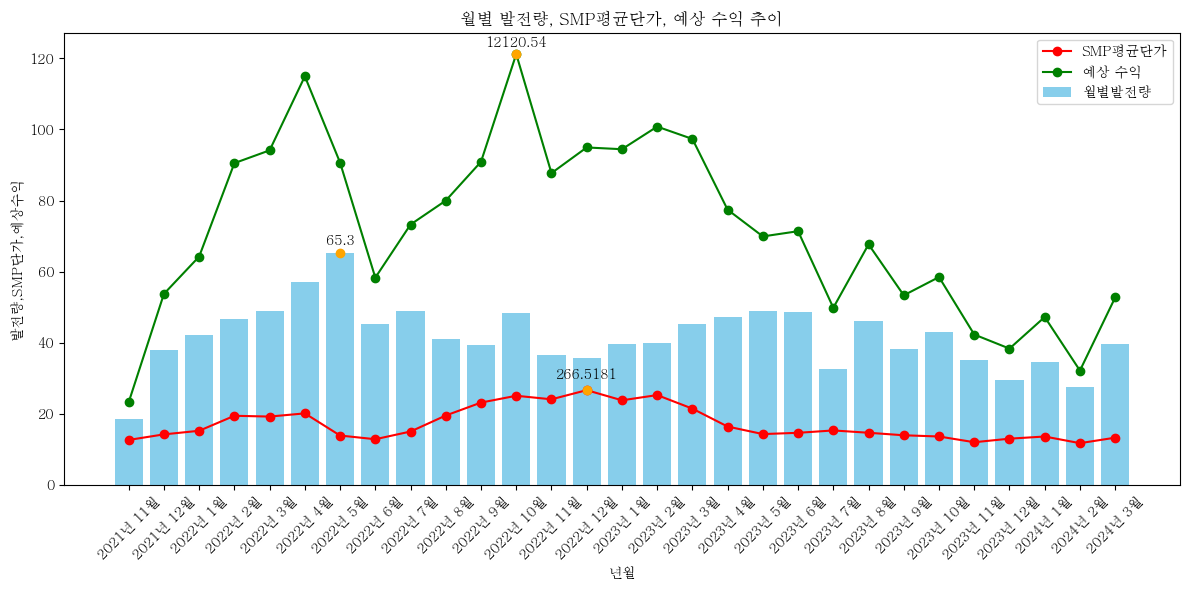

In [596]:
# 월별 발전량과 SMP평균단가, 예상 수익을 그래프로 나타내기
plt.figure(figsize=(12, 6))

# 월별 발전량(bar 차트)
plt.bar(range(len(df)), df['월별발전량'], color='skyblue', label='월별발전량')

# SMP평균단가와 예상 수익(line 차트)
plt.plot(range(len(df)), df['SMP평균단가']/10, color='red', marker='o', label='SMP평균단가')
plt.plot(range(len(df)), df['예상 수익']/100, color='green', marker='o', label='예상 수익')

# 각각의 최대값 마커로 표시
max_value_index_1 = df['월별발전량'].idxmax()
max_value_1 = df['월별발전량'].max()
plt.text(max_value_index_1, max_value_1+1.5, f'{max_value_1}', ha='center', va='bottom')

max_value_index_2 = df['SMP평균단가'].idxmax()
max_value_2 = df['SMP평균단가'].max()
plt.text(max_value_index_2, max_value_2/10+2.5, f'{max_value_2}', ha='center', va='bottom')

max_value_index_3 = df['예상 수익'].idxmax()
max_value_3 = df['예상 수익'].max()
plt.text(max_value_index_3, max_value_3/100+1.5, f'{max_value_3}', ha='center', va='bottom')


# 최대값 마커 표시
plt.plot(max_value_index_1, max_value_1, color='orange', marker='o')

plt.plot(max_value_index_2, max_value_2/10, color='orange', marker='o')

plt.plot(max_value_index_3, max_value_3/100, color='orange', marker='o')

# 레전드(범례) 표시
plt.legend()

# x축 눈금 설정
plt.xticks(range(len(df)), [f'{int(row["년"])}년 {int(row["월"])}월' for idx, row in df.iterrows()], rotation=45)

# 그래프 제목과 축 라벨 설정
plt.title('월별 발전량, SMP평균단가, 예상 수익 추이')
plt.xlabel('년월')
plt.ylabel('발전량,SMP단가,예상수익')

# 그래프 표시
plt.tight_layout()
plt.show()
